In [1]:
import keras
import os
os.environ['KERAS_BACKEND']='tensorflow'
import h5py
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Input, Dense, Flatten, Convolution2D, Conv2DTranspose, Dropout
from keras.layers import MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.callbacks import TensorBoard

def config():
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.4
    set_session(tf.Session(config=config))

config()
    
print('libs loaded')

/home/ian/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


libs loaded


In [2]:
def get_list():
    X_filenames = []
    path = '../input/train/'
    for root, dirs, files in os.walk(path):
        for name in files:
            X_filenames.append(os.path.join(root, name).split('/')[-1])
    return X_filenames
X_filenames = get_list()

(2, 128, 128, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
8263


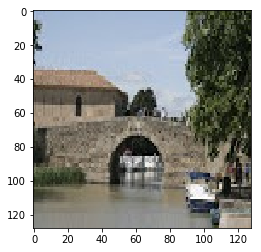

In [3]:

def load_batch(batch_size):
    path = '../input/train/'
    X_list = []
    Y_list = []
    for i in range(batch_size):
        name = random.choice(X_filenames)
        X_list.append(name)
        Y_list.append(int(name.split('.')[1]))
        
    #print(X_list)
    #print(Y_list)
    
    size = 128
    data_shape = (batch_size, size, size, 3)
    X = np.zeros(data_shape)
    
    for i in range(batch_size):
        f = X_list[i]
        img = np.array(cv2.imread(path + f))# BGR
        #print(img.shape)
        X[i] = img
        
    X = X.astype('float32')
    X /= 255
    
    Y = np.zeros((batch_size, 14951)) # one hot
    Y[np.arange(batch_size), Y_list] = 1
    
    return X, Y
    
X_train, Y_train = load_batch(2)
print(X_train.shape)
plt.imshow(cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB))
print(Y_train)

for i in range(len(Y_train[0])):
    if Y_train[0][i] ==1:
        print(i)

In [4]:
# keep training
m_num = 10000

# load
model = load_model('../save/' + str(m_num) + '.model.h5')

In [5]:

# optimizer
opt = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# logs
tensorboard = TensorBoard(log_dir='../logs', histogram_freq=0, write_graph=True, write_grads=True, write_images=True)

In [6]:
# training
nb_epoch = 50000
for e in range(nb_epoch):
    print()
    print("* Epoch %d" % e)
    X_batch, Y_batch = load_batch(500)
    model.fit(X_batch, Y_batch, 
              validation_split=0.3, 
              shuffle=True,
              callbacks=[tensorboard])
    
    if (e+1) % 1000 == 0:
        model.save('../save/' + str(m_num + e + 1) + '.model.h5')
        print('/// model saved ///')

del model


* Epoch 0
Train on 350 samples, validate on 150 samples
Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[4000,14951] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training_1/Adam/mul_43 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Adam_1/beta_2/read, training_1/Adam/Variable_18/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'training_1/Adam/mul_43', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ian/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ian/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ian/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/ian/.local/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/home/ian/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 760, in _run_callback
    ret = callback()
  File "/home/ian/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ian/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/home/ian/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/ian/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ian/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/ian/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ian/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ian/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ian/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ian/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ian/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ian/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/ian/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ian/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ian/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-b1ab1a910c31>", line 10, in <module>
    callbacks=[tensorboard])
  File "/home/ian/.local/lib/python3.5/site-packages/keras/models.py", line 963, in fit
    validation_steps=validation_steps)
  File "/home/ian/.local/lib/python3.5/site-packages/keras/engine/training.py", line 1682, in fit
    self._make_train_function()
  File "/home/ian/.local/lib/python3.5/site-packages/keras/engine/training.py", line 990, in _make_train_function
    loss=self.total_loss)
  File "/home/ian/.local/lib/python3.5/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/ian/.local/lib/python3.5/site-packages/keras/optimizers.py", line 467, in get_updates
    v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variables.py", line 775, in _run_op
    return getattr(ops.Tensor, operator)(a._AsTensor(), *args)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 907, in binary_op_wrapper
    return func(x, y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 1131, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 2798, in _mul
    "Mul", x=x, y=y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[4000,14951] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training_1/Adam/mul_43 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Adam_1/beta_2/read, training_1/Adam/Variable_18/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

